### Import libraries

In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Get data

In [3]:
player_code={
    'Romelu-Lukaku':'5eae500a',
    'Cristiano-Ronaldo':'dea698d9',
    'Kylian-Mbappe':'42fd9c7f',
    'Karim-Benzema':'70d74ece',
    'Andrej-Kramaric':'603cb947',
    'Ciro-Immobile':'4431aed2',
    'Robert-Lewandowski':'8d78e732',
    'Lionel-Messi':'d70ce98e',
    'Zlatan-Ibrahimovic':'4cde5509',
    'Harry-Kane':'21a66f6a',
    'Michail-Antonio':'ac05f970',
    'Edin-Dzeko':'3bb7f478',
    'Erling-Haaland':'1f44ac21'
}

In [4]:
player_name='Romelu-Lukaku'
url=f"https://fbref.com/en/players/{player_code[player_name]}/{player_name}"
url

'https://fbref.com/en/players/5eae500a/Romelu-Lukaku'

In [7]:
soup=BeautifulSoup(requests.get(url).text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
   <link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202109021" rel="dns-prefetch"/>
   <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
   <script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://quantcast.mgr.consensu.org'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js')
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, f

In [8]:
rows=soup.find('table', {'id':'scout_summary_FW'}).find_all('tr')

In [9]:
col_names=[x.text for x in rows[0].find_all('th')]

In [10]:
data=[]
for row in rows[1:]:
    stat=row.find('th').text
    if stat!='':
        per_90=float(row.find_all('td')[0].text.strip().replace('%',''))
        perc=float(row.find_all('td')[1].text.strip())
        data.append([stat,per_90,perc])
data

[['Non-Penalty Goals', 0.63, 89.0],
 ['npxG', 0.58, 95.0],
 ['Shots Total', 2.93, 75.0],
 ['Assists', 0.27, 85.0],
 ['xA', 0.23, 92.0],
 ['npxG+xA', 0.81, 96.0],
 ['Shot-Creating Actions', 3.51, 90.0],
 ['Passes Attempted', 23.23, 51.0],
 ['Pass Completion %', 72.9, 50.0],
 ['Progressive Passes', 2.05, 73.0],
 ['Progressive Carries', 3.56, 71.0],
 ['Dribbles Completed', 1.22, 61.0],
 ['Touches (Att Pen)', 7.56, 96.0],
 ['Progressive Passes Rec', 12.03, 98.0],
 ['Pressures', 8.22, 5.0],
 ['Tackles', 0.27, 7.0],
 ['Interceptions', 0.07, 2.0],
 ['Blocks', 0.54, 22.0],
 ['Clearances', 1.05, 86.0],
 ['Aerials won', 1.42, 38.0]]

In [11]:
df=pd.DataFrame(columns=col_names, data=data)

In [12]:
df

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.63,89.0
1,npxG,0.58,95.0
2,Shots Total,2.93,75.0
3,Assists,0.27,85.0
4,xA,0.23,92.0
5,npxG+xA,0.81,96.0
6,Shot-Creating Actions,3.51,90.0
7,Passes Attempted,23.23,51.0
8,Pass Completion %,72.90,50.0
9,Progressive Passes,2.05,73.0


### Function that return player df

In [13]:
def fbref_scrapper(player_name='Romelu-Lukaku'):
    print(f'scraping data :{player_name}')
    url=f"https://fbref.com/en/players/{player_code[player_name]}/{player_name}"
    print(url)
    soup=BeautifulSoup(requests.get(url).text, 'html.parser')
    rows=soup.find('table', {'id':'scout_summary_FW'}).find_all('tr')
    data=[]
    for row in rows[1:]:
        stat=row.find('th').text
        if stat!='':
            per_90=float(row.find_all('td')[0].text.strip().replace('%',''))
            perc=float(row.find_all('td')[1].text.strip())
            data.append([stat,per_90,perc])
    df=pd.DataFrame(columns=col_names, data=data)
    df.to_csv(f'{player_name}.csv',index=None)
    return(df)

In [14]:
fbref_scrapper()

scraping data :Romelu-Lukaku
https://fbref.com/en/players/5eae500a/Romelu-Lukaku


,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.63,89.0
1,npxG,0.58,95.0
2,Shots Total,2.93,75.0
3,Assists,0.27,85.0
4,xA,0.23,92.0
5,npxG+xA,0.81,96.0
6,Shot-Creating Actions,3.51,90.0
7,Passes Attempted,23.23,51.0
8,Pass Completion %,72.90,50.0
9,Progressive Passes,2.05,73.0


### Select KPIs

In [15]:
list(df.Statistic)

['Non-Penalty Goals',
 'npxG',
 'Shots Total',
 'Assists',
 'xA',
 'npxG+xA',
 'Shot-Creating Actions',
 'Passes Attempted',
 'Pass Completion %',
 'Progressive Passes',
 'Progressive Carries',
 'Dribbles Completed',
 'Touches (Att Pen)',
 'Progressive Passes Rec',
 'Pressures',
 'Tackles',
 'Interceptions',
 'Blocks',
 'Clearances',
 'Aerials won']

In [16]:
kpis=['npxG','xA','Shot-Creating Actions','Touches (Att Pen)','Progressive Passes','Dribbles Completed']

In [17]:
angles=np.linspace(0, 2*np.pi, len(kpis), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
labels=list(kpis)
labels.append(labels[0])

In [18]:
def preprocessor(df=df):
    x=[df[df.Statistic==i].Percentile.sum() for i in kpis]
    val=[df[df.Statistic==i]['Per 90'].sum() for i in kpis]
    x.append(x[0])
    val.append(val[0])
    print(x)
    return x,val

In [19]:
preprocessor(df)

[95.0, 92.0, 90.0, 96.0, 73.0, 61.0, 95.0]


([95.0, 92.0, 90.0, 96.0, 73.0, 61.0, 95.0],
 [0.58, 0.23, 3.51, 7.56, 2.05, 1.22, 0.58])

In [20]:
def plotter(name="CR7"):
    print(f'plotting {name}') 
    plt.plot(angles,x, 'o-', linewidth=1, label=name)
    ax.fill(angles, x, alpha=0.25)

    for i in range(len(val)):
        ax.text(angles[i],x[i]+8,val[i])

scraping data :Romelu-Lukaku
https://fbref.com/en/players/5eae500a/Romelu-Lukaku
[95.0, 92.0, 90.0, 96.0, 73.0, 61.0, 95.0]
plotting Romelu-Lukaku
scraping data :Cristiano-Ronaldo
https://fbref.com/en/players/dea698d9/Cristiano-Ronaldo
[96.0, 33.0, 91.0, 89.0, 78.0, 82.0, 96.0]
plotting Cristiano-Ronaldo


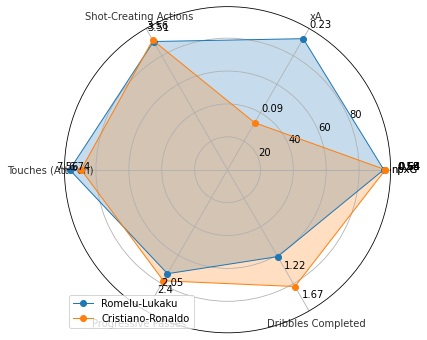

In [21]:
players=['Romelu-Lukaku','Cristiano-Ronaldo']

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

for player in players:
    df=fbref_scrapper(player_name=player)
    x,val=preprocessor(df)
    plotter(name=player)

ax.set_thetagrids(angles * 180/np.pi, labels=labels, alpha=0.8)
plt.legend()
plt.show()

In [301]:
fbref_scrapper(player_name=players[0])

scraping data :Romelu-Lukaku
https://fbref.com/en/players/dea698d9/Romelu-Lukaku


,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.66,91.0
1,npxG,0.62,96.0
2,Shots Total,4.87,99.0
3,Assists,0.11,40.0
4,xA,0.10,36.0
5,npxG+xA,0.72,91.0
6,Shot-Creating Actions,3.68,93.0
7,Passes Attempted,34.92,87.0
8,Pass Completion %,79.00,85.0
9,Progressive Passes,2.38,79.0


In [302]:
fbref_scrapper(player_name=players[1])

scraping data :Cristiano-Ronaldo
https://fbref.com/en/players/dea698d9/Cristiano-Ronaldo


,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.66,91.0
1,npxG,0.62,96.0
2,Shots Total,4.87,99.0
3,Assists,0.11,40.0
4,xA,0.10,36.0
5,npxG+xA,0.72,91.0
6,Shot-Creating Actions,3.68,93.0
7,Passes Attempted,34.92,87.0
8,Pass Completion %,79.00,85.0
9,Progressive Passes,2.38,79.0
